# Testing the module

Here I test the baseline with K-cores.

## Basic miscellaneous tests

### Preprocessing + basicDrawing

In [4]:
import numpy as np
import scipy.sparse as sps
import networkx as nx
import kwextractor_miscellaneous as kwmisc #import the module
%matplotlib inline

In [2]:
with open("./data/test/reuters.txt") as fin:
    raw = fin.read()
    
(words,txt)=kwmisc.NormalizeTextFromRaw(raw)
gow_adj = kwmisc.BuildUndirectedGoW(txt,words, window=2)
gow = nx.Graph(gow_adj)

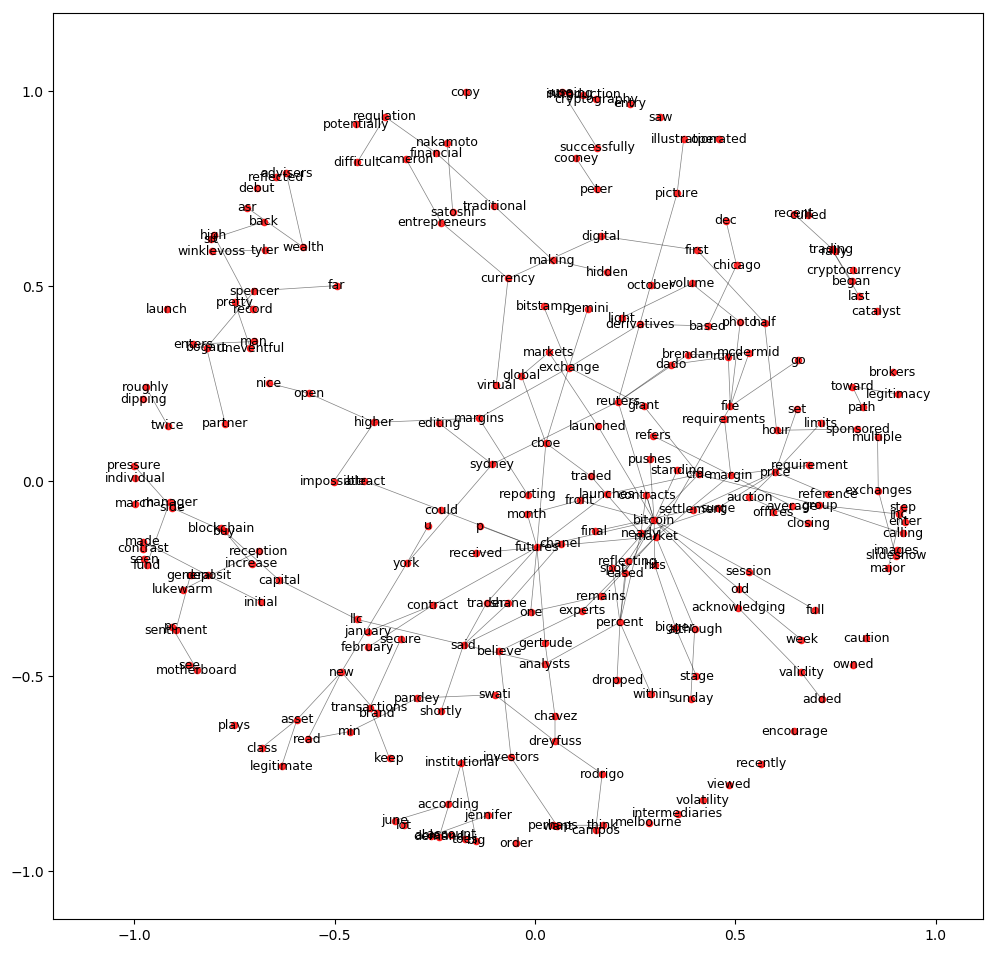

In [5]:
kwmisc.BasicDraw(gow,words)